In [21]:
from tensorflow.keras.datasets import mnist
import math, time 
import matplotlib.pyplot as plt
import numpy as np 
#!pip install seaborn
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import pickle

print("Librerias importadas")

Librerias importadas


In [2]:
df = pd.read_csv("data.csv") 
df

,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,...,Pixel_65528,Pixel_65529,Pixel_65530,Pixel_65531,Pixel_65532,Pixel_65533,Pixel_65534,Pixel_65535,Pixel_65536,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positivos
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,Negativos
2,0,0,0,0,0,0,0,0,0,1,...,7,10,15,14,6,2,8,9,11,Negativos
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positivos
4,0,0,0,0,0,0,0,2,0,0,...,2,1,2,2,2,1,0,1,1,Positivos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negativos
3996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positivos
3997,213,152,132,128,125,142,127,125,134,137,...,91,91,91,90,90,93,89,98,154,Negativos
3998,1,1,2,2,1,0,1,1,1,1,...,0,1,1,1,1,1,1,1,1,Negativos


In [5]:
MNIST_train_small_df = df.copy()
label_encoder = LabelEncoder()
MNIST_train_small_df['class'] = label_encoder.fit_transform(MNIST_train_small_df['class'])

In [6]:
X_tr = MNIST_train_small_df.iloc[:, 0:-1] 
y_tr = MNIST_train_small_df.iloc[:, -1]
print("X_tr shape",X_tr.shape)
print("y_tr shape",y_tr.shape)

X_tr shape (4000, 65536)
y_tr shape (4000,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_tr,y_tr,test_size=0.2, random_state=1, stratify=y_tr)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3200, 65536)
(800, 65536)
(3200,)
(800,)


In [11]:
model = SVC(gamma=0.1, kernel='poly', C=1.0, random_state = 0, verbose=True)

In [13]:
model.fit(X_train,y_train)

[LibSVM]

SVC(gamma=0.1, kernel='poly', random_state=0, verbose=True)

In [15]:
y_pred = model.predict(X_test)

In [17]:
model_acc = model.score(X_test, y_test)
test_acc_svm = accuracy_score(y_test, y_pred)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.96125
Precision: 0.9614836260857058
Recall: 0.9612499999999999
F1-score: 0.9612450950823463


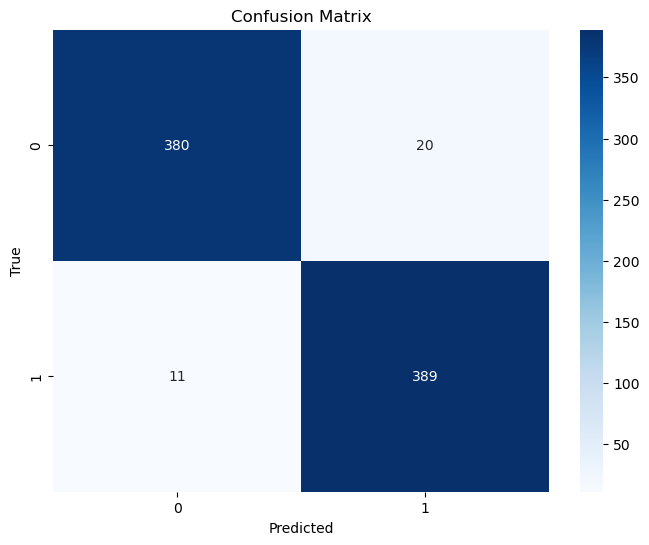

In [22]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
filename = "svc.pickle"
with open(filename, 'wb') as file:
    pickle.dump(model, file)